PDF : https://arxiv.org/pdf/2005.10186.pdf

https://github.com/Cobord/Various-Probability/blob/master/Galton-Watson.ipynb

Member 0 had this number of children: 2
Population is now: 2
Member 0 had this number of children: 0
Member 1 had this number of children: 4
Population is now: 4
Member 0 had this number of children: 3
Member 1 had this number of children: 3
Member 2 had this number of children: 3
Member 3 had this number of children: 4
Population is now: 13
Member 0 had this number of children: 4
Member 1 had this number of children: 0
Member 2 had this number of children: 0
Member 3 had this number of children: 2
Member 4 had this number of children: 1
Member 5 had this number of children: 3
Member 6 had this number of children: 2
Member 7 had this number of children: 3
Member 8 had this number of children: 3
Member 9 had this number of children: 3
Member 10 had this number of children: 3
Member 11 had this number of children: 2
Member 12 had this number of children: 1
Population is now: 27
Member 0 had this number of children: 2
Member 1 had this number of children: 1
Member 2 had this number of chi

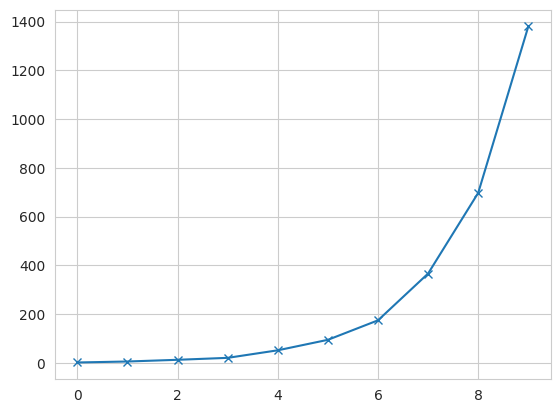

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy.stats as stats
import seaborn as sns
from scipy.stats import rv_discrete


# Pass a distribution of class rv_discrete that says how many children a member of generation i has
# also pass the initial population, usually this is 1
class Galton_Watson:
    def __init__(self, dist, initial_pop=1):
        self.distr = dist
        self.population = initial_pop
        return

    def advance_generation(self):
        num_new = self.distr.rvs(self.population).sum()
        print("Population is now: %i" % num_new)
        self.population = num_new
        return self.population

    def advance_generation_individually(self):
        num_new = 0
        for i in range(self.population):
            current = self.distr.rvs()
            print("Member %i" % (i) + " had this number of children: %i" % current)
            num_new += current
        print("Population is now: %i" % num_new)
        self.population = num_new
        return self.population

    def plot_generations(self, num_gens):
        ys = list(range(num_gens))
        for x in range(num_gens - 1):
            ys[x] = self.population
            self.advance_generation()
        ys[num_gens - 1] = self.population
        plt.plot(range(num_gens), ys, marker="x")
        plt.show()
        return


rv = scipy.stats.poisson(2)
my_gw = Galton_Watson(rv, 1)
for i in range(5):
    my_gw.advance_generation_individually()
print("Now for plot")
my_gw = Galton_Watson(rv, 1)
my_gw.plot_generations(10)

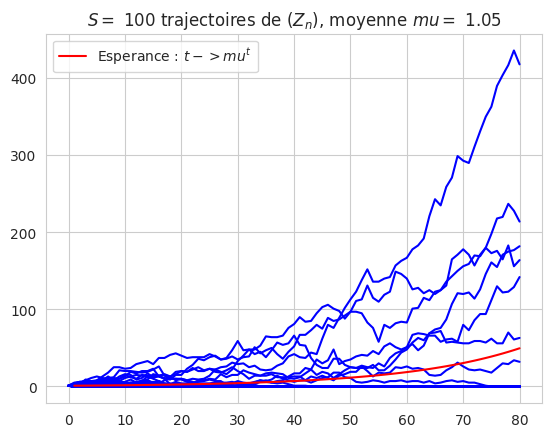

7 processus ont survécu parmi 100


In [3]:
S = 100  # Nombre de trajectoires
T = 80  # Duree de la simulation
[n, p] = [10, 0.105]  # Parametres de la binomiale
mu = n * p  # Moyenne

NbSurvivants = 0  # Compte les processus qui ont survecu
for s in range(S):
    Processus = [1]
    for t in range(T):
        Z = Processus[-1]
        Processus.append(np.random.binomial(n * Z, p))
    NbSurvivants = NbSurvivants + (
        Processus[-1] > 0
    )  # On ajoute 1 si le processus a survecu a l'instant T
    plt.plot(Processus, "b")

X = np.arange(1, T + 1)
Y = [(mu**x) for x in X]
plt.plot(X, Y, "r", label="Esperance : $t -> mu^t$")
plt.title(
    "$S=$ "
    + str(S)
    + " trajectoires de $(Z_n)$, moyenne $mu=$ "
    + str(np.round(mu, 2))
    + ""
)
plt.legend()
plt.show()
print("" + str(NbSurvivants) + " processus ont survécu parmi " + str(S) + "")

http://gerin.perso.math.cnrs.fr/QuartHeurePython/Notebook_GaltonWatson.html

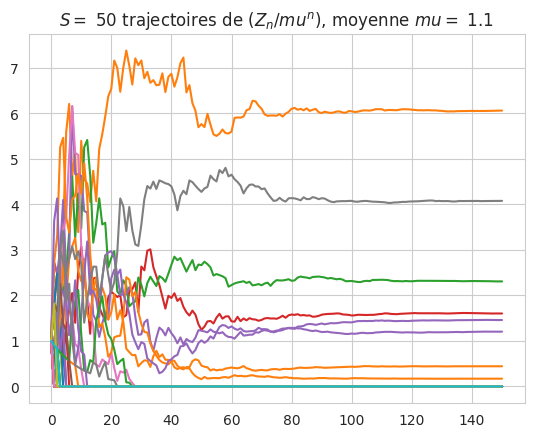

8 processus ont survécu parmi 50


In [4]:
S = 50  # Nombre de trajectoires
T = 150  # Duree de la simulation
[n, p] = [5, 0.22]  # Parametres de la binomiale
mu = n * p  # Moyenne
NbSurvivants = 0  # Compte les processus qui ont survecu

Y = np.asarray(
    [1 / (mu**x) for x in np.arange(0, T + 1)]
)  # Cree un vecteur [1/mu 1/mu^2 1/mu^3 ...]

for s in range(S):
    Processus = [1]
    for t in range(T):
        Z = Processus[-1]
        Processus.append(np.random.binomial(n * Z, p))
    NbSurvivants = NbSurvivants + (
        Processus[-1] > 0
    )  # On ajoute 1 si le processus a survecu a l'instant T
    plt.plot(Processus * Y)

plt.title(
    "$S=$ "
    + str(S)
    + " trajectoires de $(Z_n/ mu^n)$, moyenne $ mu=$ "
    + str(np.round(mu, 2))
    + ""
)
plt.show()
print("" + str(NbSurvivants) + " processus ont survécu parmi " + str(S) + "")

In [5]:
descendants = 1

In [7]:
loi = stats.poisson(1)

(array([36582., 36900., 18602.,  5987.,  1572.,   303.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <BarContainer object of 6 artists>)

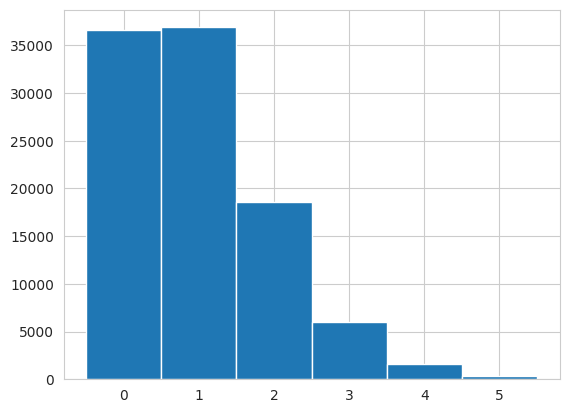

In [8]:
plt.hist(stats.poisson.rvs(1, size=100_000), bins=np.arange(-0.5, 6), edgecolor="white")

In [13]:
np.sum(loi.rvs(size=5))

6

In [64]:
def galton_watson(loi: rv_discrete, nb_epoques: int):
    nb_descendants = 1

    epoque_actuelle = 0

    while epoque_actuelle < nb_epoques and nb_descendants > 0:
        liste_descendants = loi.rvs(size=nb_descendants)
        nb_descendants = np.sum(liste_descendants)
        epoque_actuelle += 1

    return nb_descendants

In [130]:
class GaltonWatson:
    def __init__(self, loi: rv_discrete, nb_descendants: int = 1):
        self.loi = loi
        self.nb_descendants = nb_descendants
        self.liste_descendants: list[
            list[int]
        ] = []  # fixme: ce sont des listes de np.ndarray
        self.n: int = 0  # numéro de l'époque

    def simule(self, nb_epoques: int) -> int:
        epoque_actuelle = 0

        while epoque_actuelle < nb_epoques and self.nb_descendants > 0:
            liste_descendants = self.loi.rvs(size=self.nb_descendants)
            self.liste_descendants.append(liste_descendants)
            self.nb_descendants = np.sum(liste_descendants)

            epoque_actuelle += 1

        self.n = len(self.liste_descendants)

        return self.nb_descendants

In [131]:
poisson_1 = stats.poisson(1)

In [145]:
gp1 = GaltonWatson(poisson_1)

In [146]:
gp1.simule(100)
gp1.liste_descendants

[array([3]),
 array([2, 0, 2]),
 array([2, 0, 1, 4]),
 array([0, 1, 1, 1, 1, 0, 2]),
 array([0, 1, 0, 0, 1, 0]),
 array([0, 3]),
 array([1, 1, 1]),
 array([1, 1, 4]),
 array([1, 2, 1, 2, 3, 1]),
 array([2, 2, 0, 1, 1, 3, 5, 1, 0, 0]),
 array([1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0]),
 array([1, 0, 1, 2, 0, 0, 0, 0, 1]),
 array([0, 2, 0, 0, 1]),
 array([0, 0, 1]),
 array([0])]

In [147]:
len(gp1.liste_descendants)

15

In [128]:
gp1.n

10

In [65]:
nb_simulations = 10_000
nb_epoques = 100

simu_poisson_1 = [galton_watson(poisson_1, nb_epoques) for _ in range(nb_simulations)]

In [54]:
nb_simulations = 10_000
nb_epoques = 100

simu_poisson_1 = [galton_watson(poisson_1, nb_epoques) for _ in range(nb_simulations)]

In [59]:
a = np.array(simu_poisson_1)

In [61]:
np.sum(a > 0)

202

In [62]:
a[a > 0]

array([ 92,  79,   9,  82,  29,  35,   5,  72,  40,  25,  20,  64,  84,
       145,  47, 116,  77,  27, 146,   2, 162, 120,  86,  35, 101,  34,
        41,  69,  33, 112,  60, 290,   3,   3,   6,  10,  33,   1, 131,
        35,   9, 112,  37,  44,   9,  16,  18,  44,  14,  77,  20,  10,
        30,  41,  38,  62,  15,  74,  78,  19,   8,  16,  89, 216,   6,
       110,  46, 170,   6, 333,  13, 117,  56,  46,  66,  19,  24,  54,
        78,   7,  13,  40,  48,  80,   7,   5,   2,  69,  43,  19,  21,
         4, 158,  42,  21,  45,  67,  28, 105, 223,  55,  32,   8, 125,
        41,  14, 135,  43,  70,  34,  68,   7, 154,   4,   2,   4,  55,
       115,  27,   2,  41, 153,  64,  66, 108, 100,  16,   8,  52,  68,
        74,  37,  65,  23,  32,  23,  67,   1, 101,  16,  61,   7,  15,
        41,  52,  65,  22,  17,  42,  71,  11,  93,  13, 130,   2,  21,
         9,  26,  44,  18,  60, 118,  82, 105,  20,   6,  35,  38,  74,
       132,  93, 211,  66,  20,   7,   7,   6,  86,   8,  59,  1

(array([90., 49., 30., 18.,  8.,  2.,  3.,  0.,  1.,  1.]),
 array([  1. ,  34.2,  67.4, 100.6, 133.8, 167. , 200.2, 233.4, 266.6,
        299.8, 333. ]),
 <BarContainer object of 10 artists>)

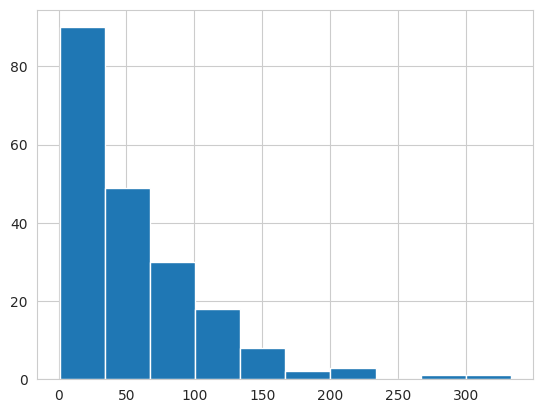

In [63]:
plt.hist(a[a > 0])